<a href="https://colab.research.google.com/github/el-muarrof/MachineLearning/blob/main/Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [1]:
import os
import zipfile
import shutil

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import Adam, SGD

In [3]:
#ekstrak zip
import os
import zipfile

local_zip = '/content/drive/MyDrive/Tubes_ML/BreastCancerOriginal.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
base_dataset = "/content/Breast_cancer"
cancer_dir = os.listdir(base_dataset)

In [5]:
#memastikan gambar png
for class_item in cancer_dir:
  cur_dir = base_dataset+"/"+class_item
  for dir in os.listdir(cur_dir):
    items_dir = cur_dir+"/"+dir
    for item in os.listdir(items_dir):
      if not item.endswith(".png"):
          os.remove(os.path.join(cur_dir, item))
    

In [4]:
BreastCancerImage = 'BreastCancerImage'
image_non_idc_dir = '/content/BreastCancerImage/non_idc'
image_idc_dir = '/content/BreastCancerImage/idc'

os.mkdir (BreastCancerImage)
os.mkdir (image_non_idc_dir)
os.mkdir (image_idc_dir)

In [ ]:
import shutil

#jadikan 1
for patient in cancer_dir:   
    path_0 = base_dataset +'/'+str(patient) + '/0'
    path_1 = base_dataset +'/'+str(patient) + '/1'
    file_list_0 = os.listdir(path_0)   
    file_list_1 = os.listdir(path_1)
    for fname in file_list_0:
            src = os.path.join(path_0, fname)
            dst = os.path.join(image_non_idc_dir, fname)
            shutil.copyfile(src, dst)
    for fname in file_list_1: 
        src = os.path.join(path_1, fname)
        dst = os.path.join(image_idc_dir, fname)
        shutil.copyfile(src, dst)

In [8]:
print (len(os.listdir('/content/BreastCancerImage/idc')))
print (len(os.listdir('/content/BreastCancerImage/non_idc')))

78786
198738


In [9]:
!pip install split-folders

In [10]:
import splitfolders

In [11]:
splitfolders.ratio("/content/BreastCancerImage", output='SplitWithRatio', seed=42, ratio=(0.5, 0.5),group_prefix=None)

Copying files: 277524 files [02:50, 1627.06 files/s]


In [12]:
#print ("Test idc :" ,len(os.listdir('/content/SplitWithRatio/test/idc')))
#print ("Test non idc :" ,len(os.listdir('/content/SplitWithRatio/test/non_idc')))
print ("train idc :" ,len(os.listdir('/content/SplitWithRatio/train/idc')))
print ("train non idc :" ,len(os.listdir('/content/SplitWithRatio/train/non_idc')))
print ("Val idc :" ,len(os.listdir('/content/SplitWithRatio/val/idc')))
print ("Val non idc :" ,len(os.listdir('/content/SplitWithRatio/val/non_idc')))

train idc : 39393
train non idc : 99369
Val idc : 39393
Val non idc : 99369


In [5]:
train_ratio_idc_dir = '/content/SplitWithRatio/train/idc'
train_ratio_non_idc_dir = '/content/SplitWithRatio/train/non_idc'
val_ratio_idc_dir = '/content/SplitWithRatio/val/idc'
val_ratio_non_idc_dir = '/content/SplitWithRatio/val/non_idc'

train_ratio_idc = os.listdir(train_ratio_idc_dir)
train_ratio_non_idc = os.listdir(train_ratio_non_idc_dir)
val_ratio_idc = os.listdir(val_ratio_idc_dir)
val_ratio_non_idc = os.listdir(val_ratio_non_idc_dir)

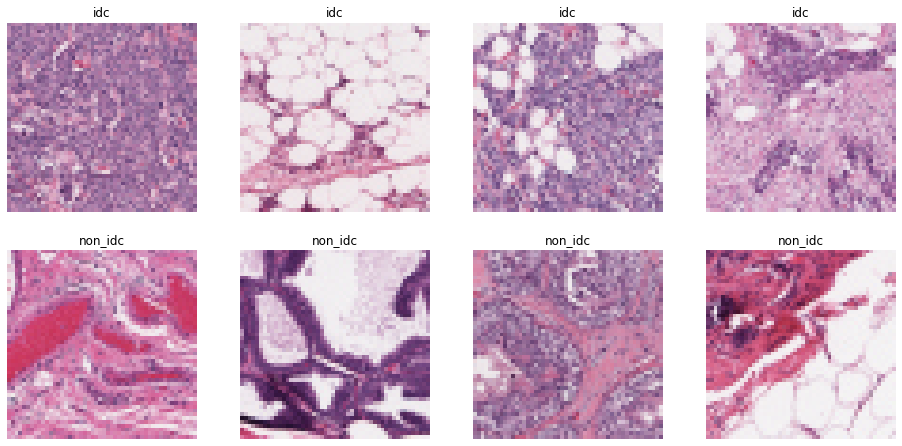

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index +=4
next_idc_ratio = [os.path.join(train_ratio_idc_dir, fname) 
                for fname in os.listdir(train_ratio_idc_dir)[pic_index-4:pic_index]]
next_non_idc_ratio = [os.path.join(train_ratio_non_idc_dir, fname) 
                for fname in os.listdir(train_ratio_non_idc_dir)[pic_index-4:pic_index]]


for i, img_path in enumerate(next_idc_ratio+next_non_idc_ratio):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.title(img_path.split(os.path.sep)[-2])
  plt.imshow(img)

plt.show()


# Preprocessing

In [15]:
splitfolders.ratio("/content/SplitWithRatio/train", output='Datasets', seed=42, ratio=(.85, .14, .01),group_prefix=None)

Copying files: 138762 files [01:20, 1713.85 files/s]


In [16]:
print ("Test idc :" ,len(os.listdir('/content/Datasets/test/idc')))
print ("Test non idc :" ,len(os.listdir('/content/Datasets/test/non_idc')))
print ("train idc :" ,len(os.listdir('/content/Datasets/train/idc')))
print ("train non idc :" ,len(os.listdir('/content/Datasets/train/non_idc')))
print ("Val idc :" ,len(os.listdir('/content/Datasets/val/idc')))
print ("Val non idc :" ,len(os.listdir('/content/Datasets/val/non_idc')))

Test idc : 394
Test non idc : 995
train idc : 33484
train non idc : 84463
Val idc : 5515
Val non idc : 13911


In [7]:
import cv2
import numpy as np

# Gather data train
x_train = []
y_train= []
for r, d, f in os.walk('/content/Datasets/train'):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (60,60))
            x_train.append(image)
            label = imagePath.split(os.path.sep)[-2]
            y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

In [8]:
# Gather data val
x_val = []
y_val = []
for r, d, f in os.walk('/content/Datasets/val'):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (60,60))
            x_val.append(image)
            label = imagePath.split(os.path.sep)[-2]
            y_val.append(label)

x_val = np.array(x_val)
y_val = np.array(y_val)

In [9]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", x_train[0][0][0])

x_train = x_train.astype('float32') / 255.0
x_test = x_val.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [238 231 238]
Data setelah di-normalisasi  [0.93333334 0.90588236 0.93333334]


In [10]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", y_train[381:391])

lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_val)

print("Label setelah di-encoder ", y_train[381:391])

Label sebelum di-encoder  ['non_idc' 'non_idc' 'non_idc' 'non_idc' 'non_idc' 'non_idc' 'non_idc'
 'non_idc' 'non_idc' 'non_idc']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
                         height_shift_range=0.1, horizontal_flip=True, fill_mode="nearest")

## **Model 1**

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [13]:
best_model_path = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(best_model_path,
                                     monitor='val_accuracy',
                                     save_best_only=True,
                                     verbose=1)
reduce_callback = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=0.000003, verbose=1)
callbacks_list = [checkpoint_callback, reduce_callback]

In [14]:
model1 = Sequential()

model1.add(InputLayer(input_shape=[60,60,3]))
model1.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=2, padding='same'))
model1.add(Dropout(0.25))
model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dropout(0.05))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                        

In [15]:
model1.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=0.001, decay=0.001/20),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [16]:
H1 = model1.fit(aug.flow(x_train, y_train, batch_size=20), epochs=20, validation_data=(x_test, y_test), callbacks= callbacks_list)

Epoch 1/20
5898/5898 [==============================] - ETA: 0s - loss: 0.4081 - accuracy: 0.8232
Epoch 00001: val_accuracy improved from -inf to 0.85036, saving model to best_model.h5
5898/5898 [==============================] - 212s 34ms/step - loss: 0.4081 - accuracy: 0.8232 - val_loss: 0.3560 - val_accuracy: 0.8504 - lr: 0.0010
Epoch 2/20
5898/5898 [==============================] - ETA: 0s - loss: 0.3719 - accuracy: 0.8421
Epoch 00002: val_accuracy improved from 0.85036 to 0.85525, saving model to best_model.h5
5898/5898 [==============================] - 196s 33ms/step - loss: 0.3719 - accuracy: 0.8421 - val_loss: 0.3437 - val_accuracy: 0.8552 - lr: 0.0010
Epoch 3/20
5898/5898 [==============================] - ETA: 0s - loss: 0.3592 - accuracy: 0.8473
Epoch 00003: val_accuracy improved from 0.85525 to 0.85730, saving model to best_model.h5
5898/5898 [==============================] - 197s 33ms/step - loss: 0.3592 - accuracy: 0.8473 - val_loss: 0.3401 - val_accuracy: 0.8573 - lr:

In [ ]:
#model1.save('/content/drive/MyDrive/Tubes_ML/Models/breast_cancer_detection.h5')

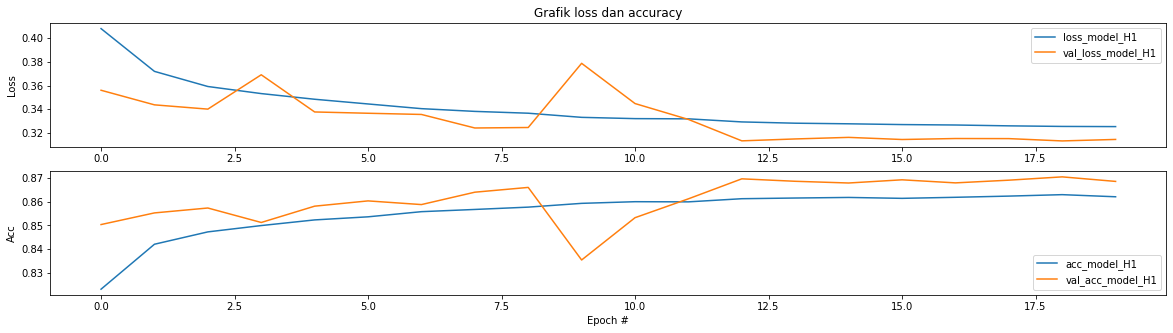

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(5)
fig.set_figwidth(20)

ax1.plot(np.arange(0, 20), H1.history["loss"], label="loss_model_H1")
ax1.plot(np.arange(0, 20), H1.history["val_loss"], label="val_loss_model_H1")
ax1.set_title("Grafik loss dan accuracy")
#ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend()


ax2.plot(np.arange(0, 20), H1.history["accuracy"], label="acc_model_H1")
ax2.plot(np.arange(0, 20), H1.history["val_accuracy"], label="val_acc_model_H1")
#ax2.set_title("Accuracy Result Plot")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Acc")
ax2.legend()

## **Evaluasi Model**


===== HASIL PREDIKSI MODEL =====
MODEL 1 : Non IDC >> 1.0
--------------------------------


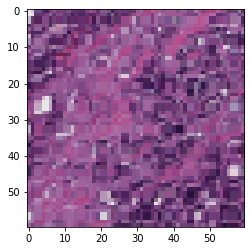

In [21]:
from tensorflow.keras.preprocessing import image
print('\n===== HASIL PREDIKSI MODEL =====')

img = image.load_img('/content/Datasets/test/idc/10254_idx5_x1651_y1601_class1.png', target_size=(60,60))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
images = np.vstack([x])
#print(f'image = {images}')

def model_1 (image):
  classes = model1.predict(images, batch_size=20)
  
  if classes == 1 :
    print(f'MODEL 1 : Non IDC >> {float(classes)}')
  else :
    print('MODEL 1 : IDC')
    

model_1(images)
#model_2(images)
print('--------------------------------')

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print('======================= MODEL 1 =======================')
pred1 = model1.predict(x_test)
labels1 = (pred1 > 0.5).astype(np.int)
print(classification_report(y_test, labels1))
print('========================================================\n\n')


======================= MODEL 1 =======================
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      5515
           1       0.91      0.91      0.91     13911

    accuracy                           0.87     19426
   macro avg       0.84      0.84      0.84     19426
weighted avg       0.87      0.87      0.87     19426





In [25]:
print('========== MODEL 1 ==========')
print(confusion_matrix(y_test, labels1))


========== MODEL 1 ==========
[[ 4281  1234]
 [ 1321 12590]]
